# Lab 03
Author: Declan Sheehan [dsheehan1@gulls.salisbury.edu]

Date: September 17th, 2020

Description: Learn how to use pandas by manipulating a dataset in order to develop charts and graphs that support a narrative, while also visualizing the data.

## Task 1:
- [X] Download the adult.data from a website.

## Task 2:
- [X] Read the data into a pandas DataFrame object.


In [7]:
import re
import numpy as np
import pandas as pd

adults = pd.read_csv('lab03data/adult.data',
                    header = None,
                    skipinitialspace = True,
                    names=['age', 'workclass', 'fnlwgt', 'education',
                             'education-num', 'marital-status', 
                             'occupation', 'relationship', 'race',
                             'sex', 'capital_gain', 'capital_loss',
                             'hr_per_week', 'country', 'income'
                    ])

## Task 3:
- [X] Pivot the data so that you can:
    - [X] Rank each occupation in terms of most likely to earn more than 50k.
    - [X] Calculate the median age of people who make more and less than 50k Calculate the medians for each again, but now split apart by the sex of the adults.
    - [X] Calculate the mean and median number of years of education held by adults who make more and less than 50k.
    - [X] Plot a histogram to see the distribution of years of school held by adults who make more and less than 50k.
    - [X] Plot a histogram to see the distribution of ages of adults who make more and less than 50k.

                   COUNT
occupation              
Exec-managerial     1968
Prof-specialty      1859
Sales                983
Craft-repair         929
Adm-clerical         507
Transport-moving     320
Tech-support         283
Machine-op-inspct    250
Protective-serv      211
?                    191
Other-service        137
Farming-fishing      115
Handlers-cleaners     86
Armed-Forces           1
Priv-house-serv        1
----------------------------------------
        Median Age
income            
<=50K           34
>50K            44
----------------------------------------
               Median Age
income sex               
<=50K  Female          34
       Male            35
>50K   Female          41
       Male            44
----------------------------------------
        Avg Yrs of Edu.
income                 
<=50K          9.595065
>50K          11.611657 
         Median Yrs of Edu.
income                    
<=50K                    9
>50K                    12
--------------

Text(0.5,0.98,'If <=50K')

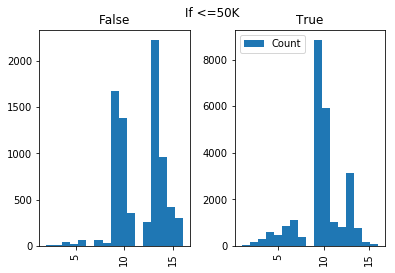

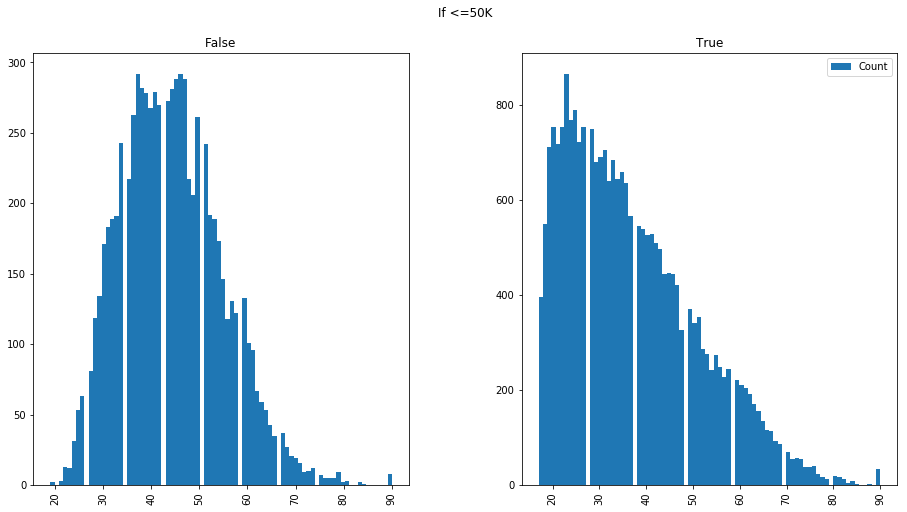

In [8]:
import pylab as pl
# Rank each occupation by likelihood of earning >50K:
occup_rank = adults.head(100000)[['occupation', 'income']] # Grab only "Occupation" & "Income" as columns.
occup_rank = occup_rank[occup_rank['income'] == '>50K'] # Include only ">50K" income values.
occup_rank = occup_rank.groupby(['occupation']).count().sort_values(['income'], ascending=False) # Group by Occup. Sorted by income descending.
occup_rank.columns = ['COUNT']
print(occup_rank)
print("----------------------------------------")

# Returns median age of people that make <=50K & >50K income.
median_incomes = adults.head(100000)[['age', 'income']].groupby(['income']).median() # Grab only "Age" & "Income" as columns.
median_incomes.columns = ['Median Age']
print(median_incomes)
print("----------------------------------------")

# Returns the same as above, but now split with respect to gender.
median_incomes_sex = adults.head(100000)[['age', 'income', 'sex']].groupby(['income', 'sex']).median()
median_incomes_sex.columns = ['Median Age']
print(median_incomes_sex)
print("----------------------------------------")

# Get the mean and median of the years of education for both <=50K & >50K income:
edu_income = adults.head(100000)[['education-num', 'income']] # Grab "Years-Of-Education" & "Income" as columns.
avg_edu_income = edu_income.groupby(['income']).mean()
med_edu_income = edu_income.groupby(['income']).median()
avg_edu_income.columns = ['Avg Yrs of Edu.']
med_edu_income.columns = ['Median Yrs of Edu.']
print(avg_edu_income, "\n", med_edu_income)
print("----------------------------------------")

# Plot a historgram to show the distribution of years of school held by adults for <=50K & >50K.
adults.head(100000)[['education-num', 'income']].hist(by=adults['income'] == '<=50K', bins=17)
pl.legend(['Count'])
pl.suptitle("If <=50K")

axis = pl.figure(figsize=(15, 8)).gca() # To make graphs appear larger.

# Plot a histogram to show the distribution of ages for adults making <=50K & >50K.
adults.head(100000)[['age', 'income']].hist(by=adults['income'] == '<=50K', bins=80, ax=axis)
pl.legend(['Count'])
pl.suptitle("If <=50K")

## Task 4:
- [X] Practice some other types of visualization with your choice of variables:
    - [X] Plot at least one bar plot that shows a trend within a variable that does not have inter-relationship.
    - [X] Plot at least one line plot that shows a trend, where the x-axis variable manifests fully across the plot domain.
    - [X] Plot at least one scatter plot of the data that suggests a relationship between two discrete variables, where the x-axis has an inter-related progression (amount, cost, process, etc.) but is notfully/evenly observed across the plot domain.
    - [X] Plot a histogram of a quantity that varies across the x-axis domain, but where we would like to consider a general distribution, rather than individual observations.

Text(0.5,0.98,'Total Hours Per Week Per Each Age')

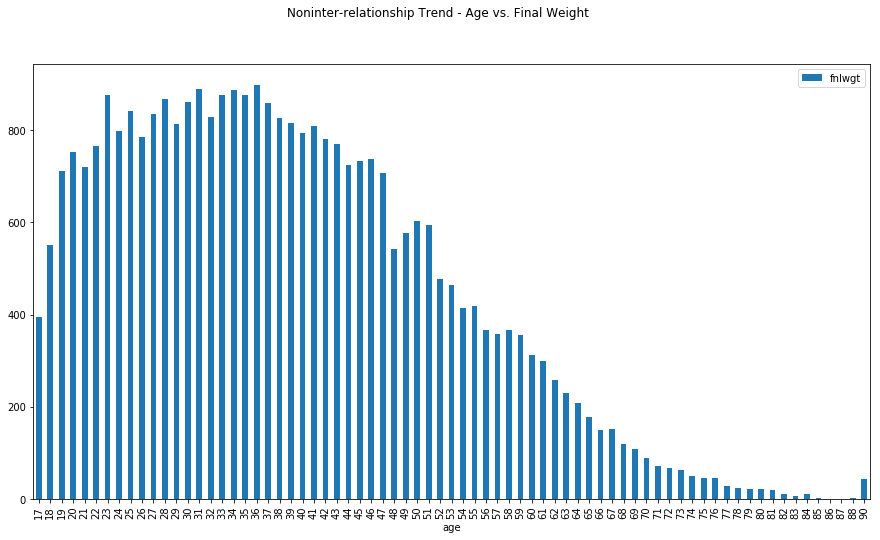

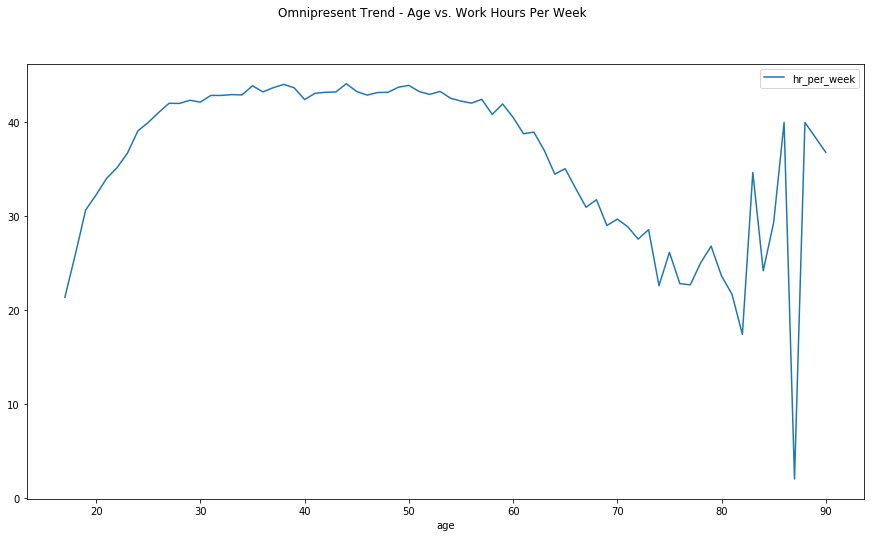

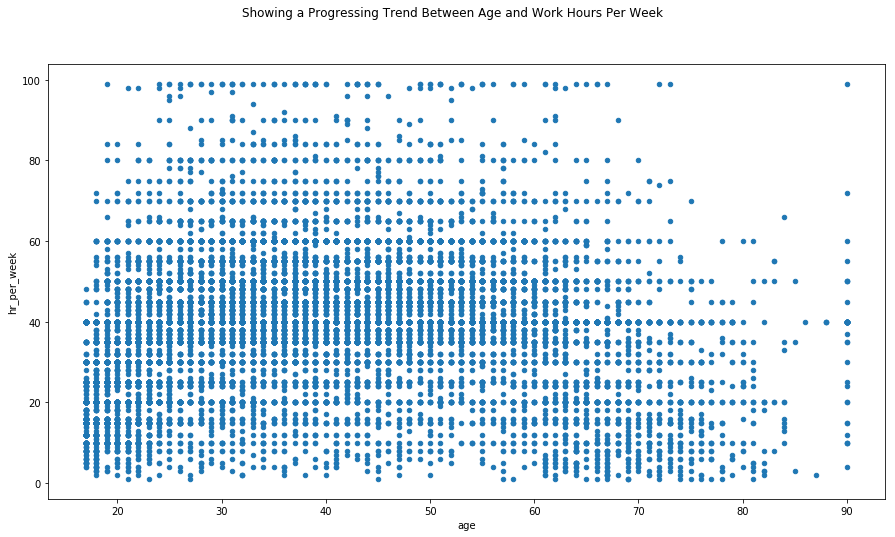

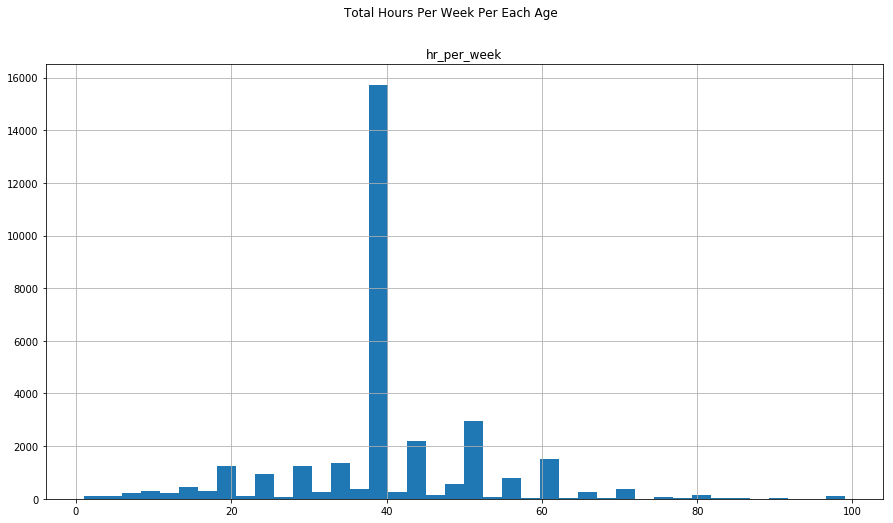

In [9]:
# Plotting age VS. fnlwgt-count, where fnlwgt-count does not have an inter-relationship.
axis = pl.figure(figsize=(15, 8)).gca() # To make graphs appear larger.
adults[['age', 'fnlwgt']].groupby(['age']).count().plot.bar(ax=axis)
pl.suptitle('Noninter-relationship Trend - Age vs. Final Weight')

# Plotting age VS. average hours-per-week, where hrs-per-wk is omnipresent throughout the domain.
axis = pl.figure(figsize=(15, 8)).gca() # I have to keep making it, or graphs print out badly.
adults[['age', 'hr_per_week']].groupby(['age']).mean().plot.line(ax=axis)
pl.suptitle('Omnipresent Trend - Age vs. Work Hours Per Week')

# Plotting age VS. hours per week, where there seems to be a decrease in the amount of work hours
# and the number of hours working is also reduced.
axis = pl.figure(figsize=(15, 8)).gca() # I have to keep making it, or graphs print out badly.
adults[['age', 'hr_per_week']].plot.scatter(x='age', y='hr_per_week', ax=axis)
pl.suptitle('Showing a Progressing Trend Between Age and Work Hours Per Week')

# Shows the number of week work hours different levels of education go through.
# Unsurprisingly, High School level education has the greatest. This is not part
# of the lab, but it is cool.
# print(adults[['education', 'hr_per_week']].groupby(['education']).sum().sort_values(['hr_per_week'], ascending=False))

# Shows sum of hours per week each age works. The x-axis varies, and we can generalize.
axis = pl.figure(figsize=(15, 8)).gca() # I have to keep making it, or graphs print out badly.
adults[['hr_per_week']].hist(bins=40, ax=axis)
pl.suptitle('Total Hours Per Week Per Each Age')

- [ ] Using pivoting, plotting, sorting, etc., attempt to answer the following questions with the data. Record your responses, with visual examples, in your notebook.
    - [X] What is the relationship between between gender and whether a person makes more than 50k?
    - [X] When a person makes more than 50, what is the relationship between gender and occupation? What about for less?
    - [ ] When are the “richest” professions in each possible native country?
    - [X] What is the relationship between race and level of education? Does it further seem to relate to whether a person makes more than 50k?

INCOME <=50K:
         income
sex           
Female    9592
Male     15128 

INCOME >50K:
         income
sex           
Female    1179
Male      6662

Where the female to male ratio is:  10771 : 21790


'Judging from the three bar graphs, all races hold similar average years of education, with the biggest disparity\nbetween Asian Pacific Islander VS. Other. In addition, people that hold greater amount of education tend to be in\nthe higher income level.'

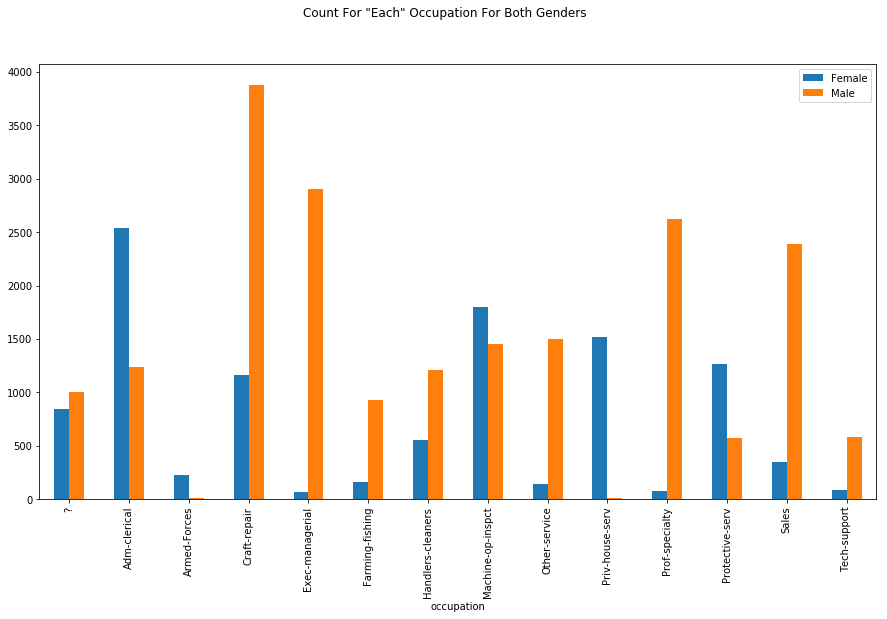

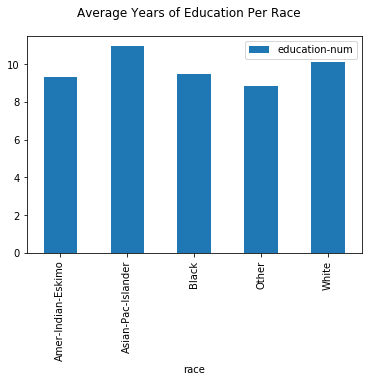

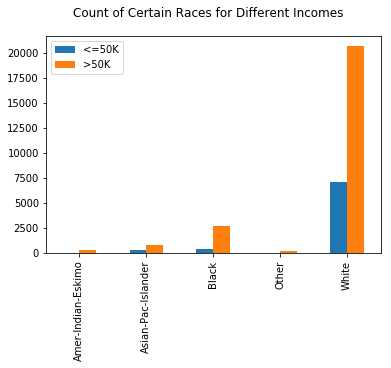

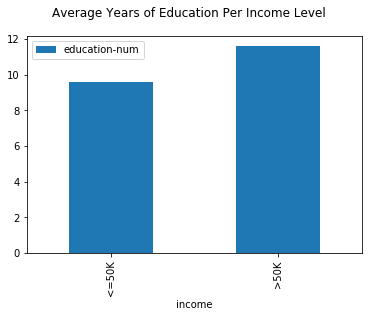

In [10]:
# ========== Q1 ==================================================
# Grab both gender and income from the main data set.
gender_income = adults[['sex', 'income']]
gender_income0 = gender_income[gender_income['income'] == '<=50K'] # Separate into <=50K ...
gender_income1 = gender_income[gender_income['income'] == '>50K'] # ... and >50K.

# Print out the number of each gender that makes either <=50K or >50K.
print("INCOME <=50K:\n", gender_income0.groupby(['sex']).count(),
      "\n\nINCOME >50K:\n", gender_income1.groupby(['sex']).count())

gender = adults['sex']

# Get the gender ratio to put into perspective above data.
female = gender[adults['sex'] == 'Female'].count()
male = gender[adults['sex'] == 'Male'].count()

print("\nWhere the female to male ratio is: ", female, ":", male)
print("==========================================================")

'''The relationship between Gender and Income levels for this dataset is:
- There are a similar amount of Females and Males in the <=50K range (if we fit for 2x males in the dataset).
- Out of the people in >50K level income, there is about (2x to 3x) the amount of males in this level than females.'''

# ========== Q2 ==================================================
# Make a double bar graph for occupation popularity per gender.
occup = adults[['income','occupation', 'sex']].groupby(['sex','occupation']).count()
occup.columns = ['COUNT']

values = []
for item in occup.values:
    values.append(item[0])
    
# The male gender has an extra occupation.
# So I needed to cut it off in order to plot.
new_index = occup.index.levels[1][0:14]

axis = pl.figure(figsize=(15, 8)).gca() # I have to keep making it, or graphs print out badly.
GO = pd.DataFrame({'Female':values[0:14], 'Male': values[14:28]}, index=new_index)
GO.plot.bar(ax=axis)
pl.suptitle('Count For \"Each\" Occupation For Both Genders')

'''Here we can see that males take up a majority more occupations than females, with the exception of Armed-Forces, and Private House Serices.
The Data is also askewed toward males, since there is approx 2x as many males in the adults dataset than females.'''

# ========== Q3 ==================================================

rich_people = adults[['income', 'occupation', 'country']]
rich_people = rich_people[rich_people['income'] == '>50K'].groupby(['country', 'occupation']).count()
rich_people.columns = ['COUNT']

# ========== Q4 ==================================================
# PART 1 (RACE VS EDUCATION LEVEL)
race_edu = adults[['race', 'education-num']].groupby(['race']).mean()
race_edu.plot.bar()
pl.suptitle('Average Years of Education Per Race')

# PART 2 (RACE VS INCOME)
race_income = adults[['sex','race', 'income']].groupby(['race','income']).count()
races, GT, LT = ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'], [], []

# Get the values for the double bar graph.
for ind in range(0, len(race_income.values)):
    if ind % 2 != 0:
        LT.append(race_income.values[ind][0])
    else:
        GT.append(race_income.values[ind][0])

comparison = pd.DataFrame({'<=50K': LT, '>50K': GT}, index=races)
comparison.plot.bar()
pl.suptitle('Count of Certain Races for Different Incomes')

# PART 3: (EDU LEVEL VS INCOME)
edu_income = adults[['income', 'education-num']].groupby(['income']).mean()
edu_income.plot.bar()
pl.suptitle('Average Years of Education Per Income Level')

'''Judging from the three bar graphs, all races hold similar average years of education, with the biggest disparity
between Asian Pacific Islander VS. Other. In addition, people that hold greater amount of education tend to be in
the higher income level.'''
